## Import Libraries

**Input:**

*   **Date:** (m/d/y)
*   **Stocks:**
    *   AAPL (Apple)
    *   JPM (JP Morgan)
    *   PG (Procter & Gamble)
    *   UAL (United Airlines)

This data includes the stock prices and returns for these companies with corresponding dates.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [69]:
daily_returns = pd.read_csv('stocks_daily_returns[1].csv')
daily_returns

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,0.000000,0.000000,0.000000,0.000000
1,1/3/2008,0.046203,-0.687708,0.000000,-0.750233
2,1/4/2008,-7.633517,-2.268378,-0.401072,4.409454
3,1/7/2008,-1.338518,1.001718,0.652615,-5.870973
4,1/8/2008,-3.597157,-3.967066,0.262103,-16.415356
...,...,...,...,...,...
3637,6/13/2022,-3.828484,-2.977838,-2.677001,-10.058308
3638,6/14/2022,0.667265,-1.663937,-3.119796,-0.081034
3639,6/15/2022,2.011147,1.183593,-0.993725,2.433084
3640,6/16/2022,-3.965145,-1.715625,0.611284,-8.207972


In [70]:
daily_prices = pd.read_csv('stocks_daily_prices[1].csv')
daily_prices

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,5.949703,29.448614,47.058838,29.915234
1,1/3/2008,5.952452,29.246094,47.058838,29.690800
2,1/4/2008,5.498071,28.582682,46.870098,31.000002
3,1/7/2008,5.424478,28.868999,47.175980,29.180000
4,1/8/2008,5.229351,27.723747,47.299629,24.389999
...,...,...,...,...,...
3637,6/13/2022,131.880005,115.989998,138.149994,37.020000
3638,6/14/2022,132.759995,114.059998,133.839996,36.990002
3639,6/15/2022,135.429993,115.410004,132.509995,37.889999
3640,6/16/2022,130.059998,113.430000,133.320007,34.779999


## Data Visualization

**Data Visualization of the companies stock using Matplotlib and Seaborn**

Text(0, 0.5, 'Price $')

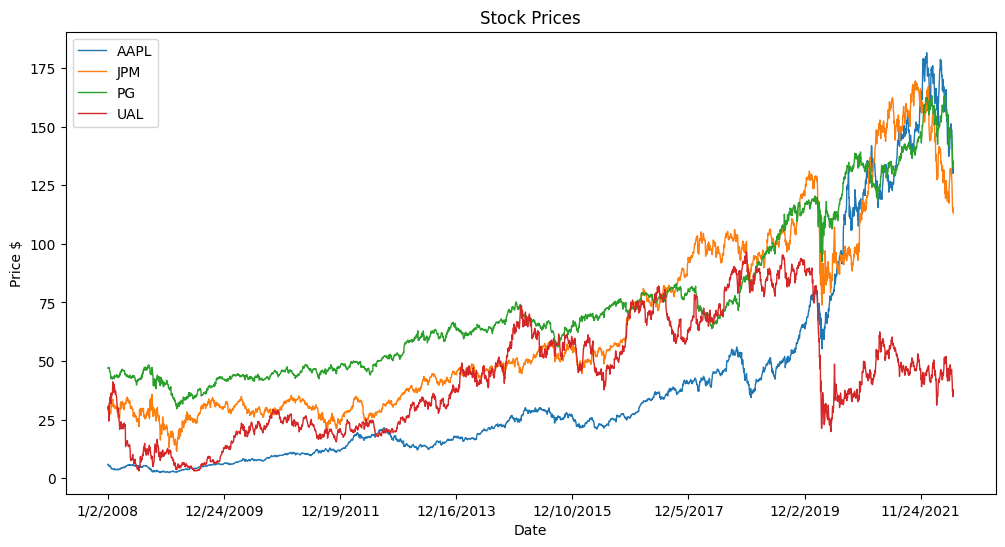

In [71]:
#Prices of the Stocks Apple, JP Morgan, Procter & Gamble, and United Airlines over the years
daily_prices.plot(x = 'Date', y =['AAPL','JPM','PG', 'UAL'], linewidth = 1, figsize = (12,6))
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price $')

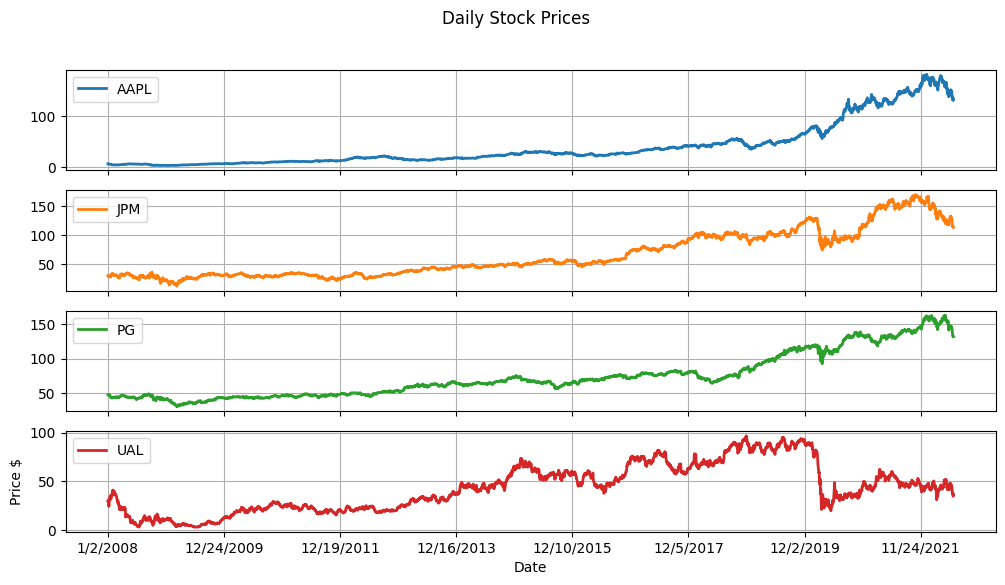

In [72]:
#Creating subplots to see the individual company stock on their own plots
daily_prices.plot(x = 'Date', title = 'Daily Stock Prices', subplots = True, grid = True, linewidth = 2, figsize = (12,6))
plt.ylabel('Price $')
plt.legend(loc = 'upper left')

Text(0.5, 1.0, 'Daily Returns of Apple vs. JP Morgan')

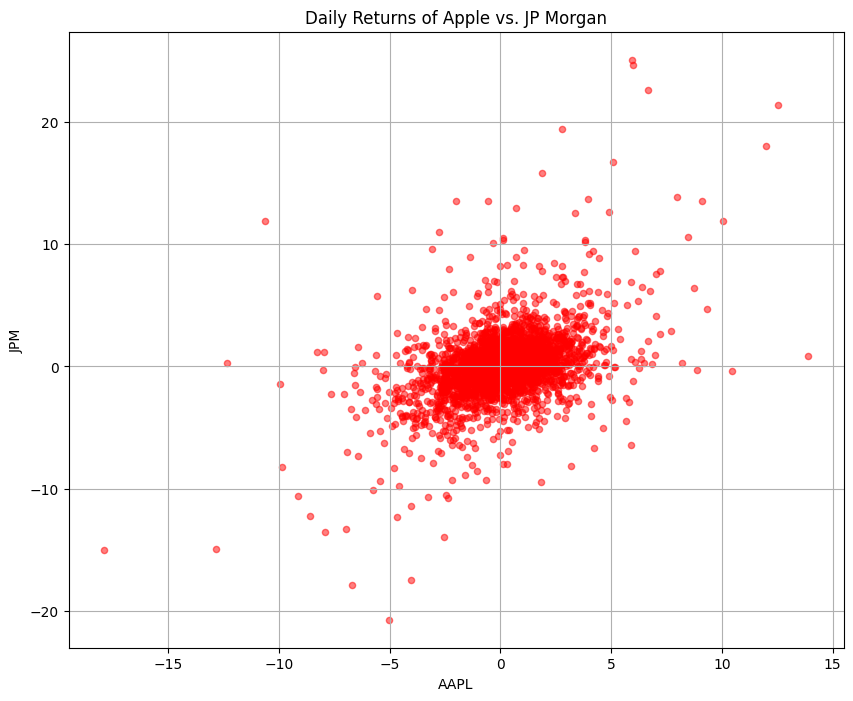

In [73]:
#Comparing daily returns from companies Apple & JP Morgan through a matplotlib scatterplot
daily_returns.plot.scatter('AAPL', 'JPM', grid = True, figsize = (10,8), alpha = 0.5, color = 'r')
plt.xlabel('AAPL')
plt.ylabel('JPM')
plt.title('Daily Returns of Apple vs. JP Morgan')

Text(0.5, 1.0, 'Daily Returns of Procter & Gamble vs. United Airlines')

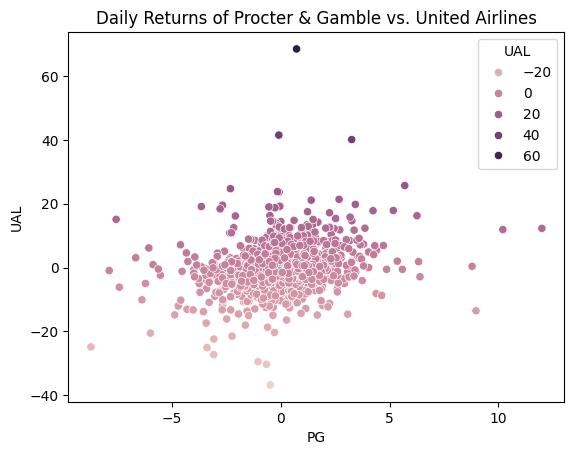

In [74]:
#Comparing daily returns from companies Procter & Gamble and United Airlines through a seaborn scatterplot
sns.scatterplot(x = 'PG', y = 'UAL', hue = 'UAL', data = daily_returns)
plt.title('Daily Returns of Procter & Gamble vs. United Airlines')

Text(0.5, 1.0, 'My Stock Portfolio')

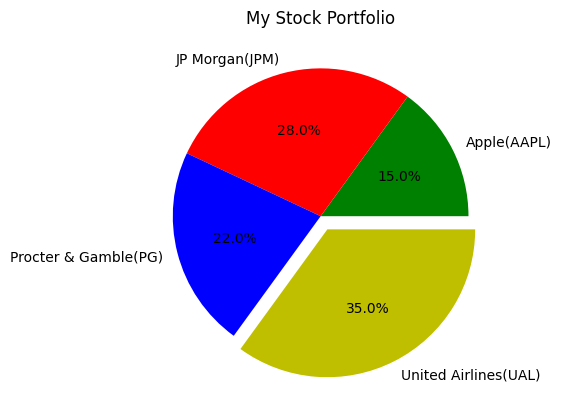

In [75]:
#Creating a piechart with custom personal stocks from the 4 companies
values = [15, 28, 22, 35]
colors = ['g', 'r', 'b', 'y']
explode = [0, 0, 0, 0.1]
labels = ['Apple(AAPL)', 'JP Morgan(JPM)', 'Procter & Gamble(PG)', 'United Airlines(UAL)']

plt.pie(values, colors = colors, explode = explode, labels = labels, autopct = '%1.1f%%')
plt.title('My Stock Portfolio')

Text(0.5, 1.0, 'Daily Returns Correlation Heatmap')

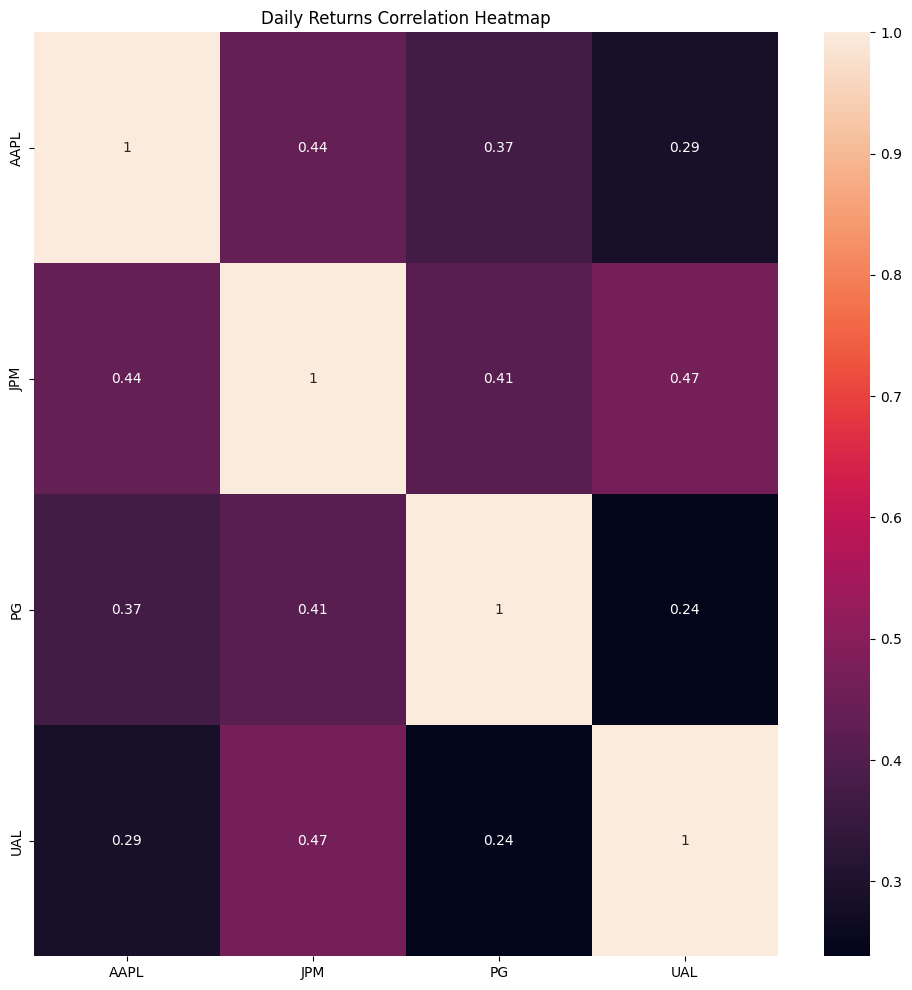

In [76]:
#Creating a heat map to see the general daily returns correlation from the 4 companies
plt.figure(figsize = (12,12))
sns.heatmap(daily_returns.drop('Date', axis = 1).corr(), annot = True)
plt.title('Daily Returns Correlation Heatmap')

Text(0.5, 1.0, 'Daily Returns Distribution')

<Figure size 2000x1500 with 0 Axes>

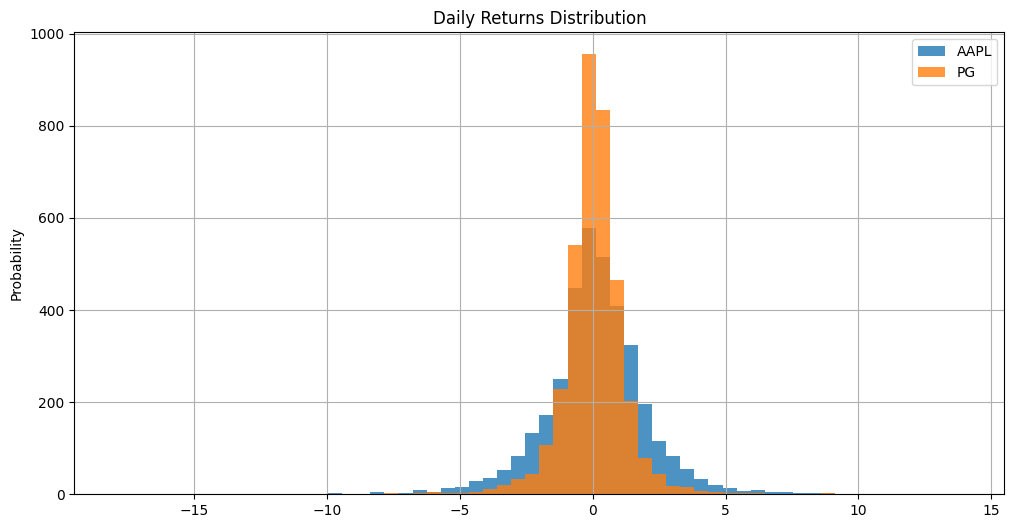

In [77]:
#Creating a histogram to compare the daily returns distribution between companies Apple and Procter & Gamble
plt.figure(figsize = (20,15));

md_APPL = daily_returns['AAPL'].mean().round(2)
sd_AAPL = daily_returns['AAPL'].mean().round(2)

md_PG = daily_returns['PG'].mean().round(2)
sd_PG = daily_returns['PG'].mean().round(2)

daily_returns[['AAPL', 'PG']].plot.hist(bins = 60, alpha = 0.8, figsize = (12,6));
plt.grid()
plt.ylabel('Probability')
plt.title('Daily Returns Distribution')

Text(0.5, 0.92, 'Daily Returns Distribution')

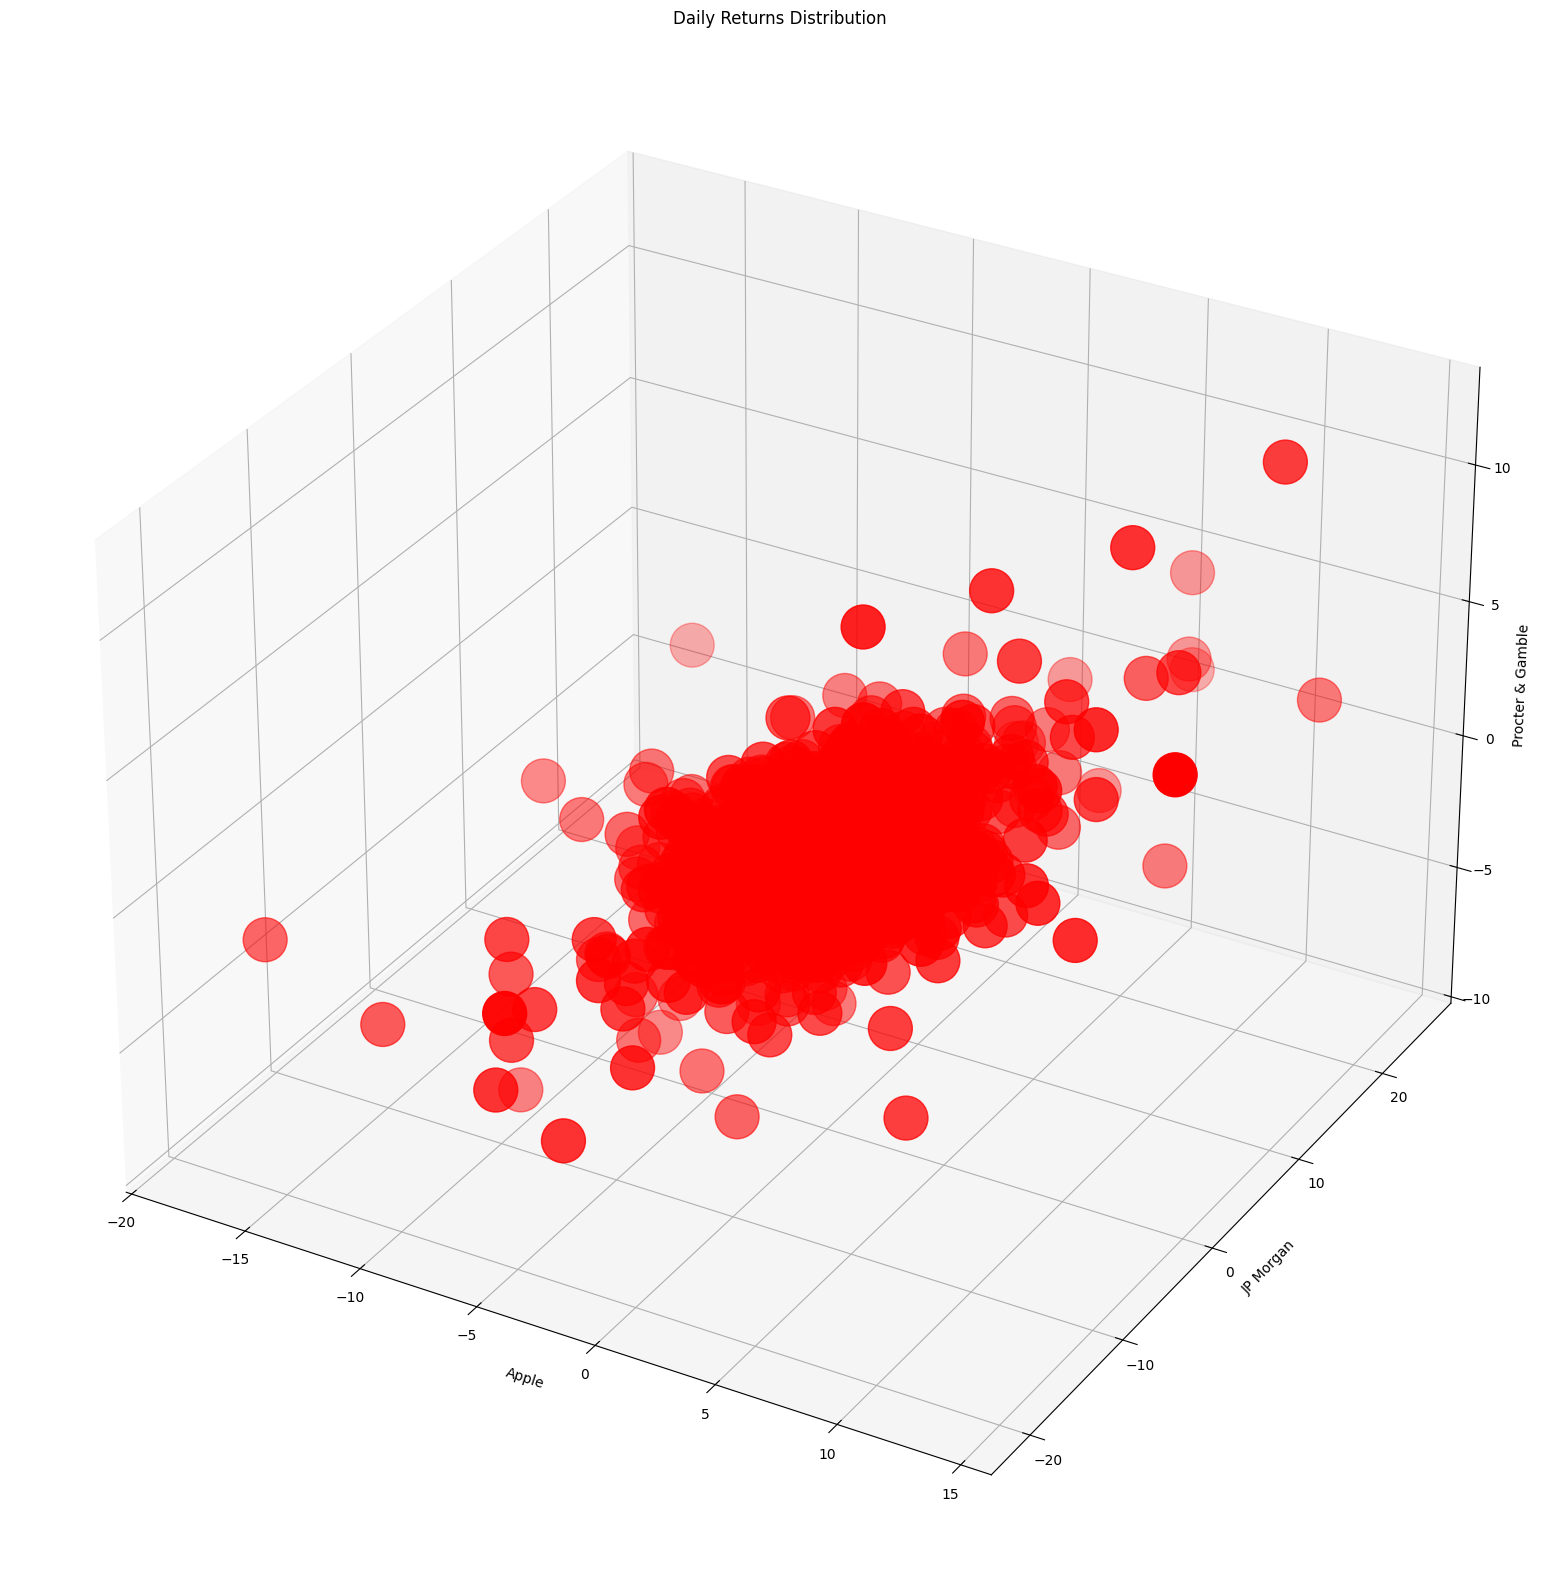

In [78]:
#Creating a 3d scatterplot to compare the daily returns distribution between companies Apple, JP Morgan, and Procter & Gamble
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection = '3d')

x = daily_returns['AAPL'].tolist()
y = daily_returns['JPM'].tolist()
z = daily_returns['PG'].tolist()

ax.scatter(x, y, z, c = 'r', marker = 'o', s = 1000)
ax.set_xlabel('Apple')
ax.set_ylabel('JP Morgan')
ax.set_zlabel('Procter & Gamble')
plt.title('Daily Returns Distribution')

# Summary of the Data

**Timeframe:** 3,642 trading days (= 14 years, from 2008 onward).

**Stocks included:**

*   AAPL (Apple)
*   JPM (JP Morgan)
*   PG (Procter & Gamble)
*   UAL (United Airlines)

**Metrics:** Daily adjusted prices and daily returns.

## Prices (Descriptive Stats)

*   **Mean**
    *   **AAPL:** = $39.6
    *   **JPM:** = $64.9
    *   **PG:** = $73.7
    *   **UAL:** = $43.2

## Returns (Daily % Change)

**Average Daily Return:**

*   AAPL = 0.10%
*   JPM = 0.07%
*   PG = 0.04%
*   UAL = 0.10%

**Extreme Events:**

*   UAL had swings up to +68.5% and -36.8% in a day.
*   JPM reached +25% in a day, but also -20%.
*   AAPL max daily move was around +14%, down -18%.
*   PG was much more contained: +12% / -8%.

## Key Insights

**Risk vs. Stability:**

*   PG (consumer staples) is the most stable, with steady returns and low volatility.
*   UAL (airline sector) is extremely volatile—reflecting sensitivity to oil prices, travel demand, and global events (e.g., 2008 crisis, 2020 pandemic).
*   AAPL and JPM fall in between, but AAPL shows strong long-term price growth.

**Sector Influence:**

*   Tech (AAPL): High growth but subject to tech cycles.
*   Financials (JPM): More volatile due to financial crises and rate cycles.
*   Consumer Staples (PG): Defensive stock, stable during downturns.
*   Airlines (UAL): Cyclical and highly event-driven.

**Return Distributions:**

*   All stocks show heavy tails (big up/down days), suggesting non-normal distributions.
*   UAL in particular has fat tails, indicating crash risk and windfall potential.

## Hypotheses

*   **Defensive Hedge Hypothesis:** PG provides protection in downturns (financial crisis, pandemic), while cyclical stocks (UAL, JPM) suffer disproportionately.
*   **Tech Outperformance Hypothesis:** AAPL should exhibit stronger long-term growth due to innovation-driven cycles, despite volatility.
*   **Volatility Correlation Hypothesis:** UAL’s returns will correlate negatively with economic shocks and oil price spikes, while PG will remain resilient.
*   **Diversification Hypothesis:** A portfolio balanced across these sectors would achieve better risk-adjusted returns than concentrating in UAL or AAPL alone.

## Conclusions

*   **Best long-term growth stock:** AAPL (tech dominance).
*   **Best defensive stock:** PG (low volatility, stable returns).
*   **Highest risk-reward:** UAL (wild swings, event-driven).
*   **Sector diversification is essential:** tech + consumer staples + financials + cyclical industries create a balanced portfolio.